Company

Online fitness platform

Product

Monthly subscription

Your Role

Junior data analyst

**"Hey, I need your help analyzing how much customers spend on in-app purchases during their first month.

We want to understand typical spending, detect unusual behavior, and estimate the true average spending of new users.

Here is a random sample of 30 customers.
Please take a look and get back to me with insights."**

spending = [
    12, 15, 18, 22, 25, 27, 30, 33, 35, 38,
    14, 17, 19, 23, 26, 29, 31, 34, 36, 40,
    10, 12, 14, 20, 24, 28, 32, 45, 60, 75
]


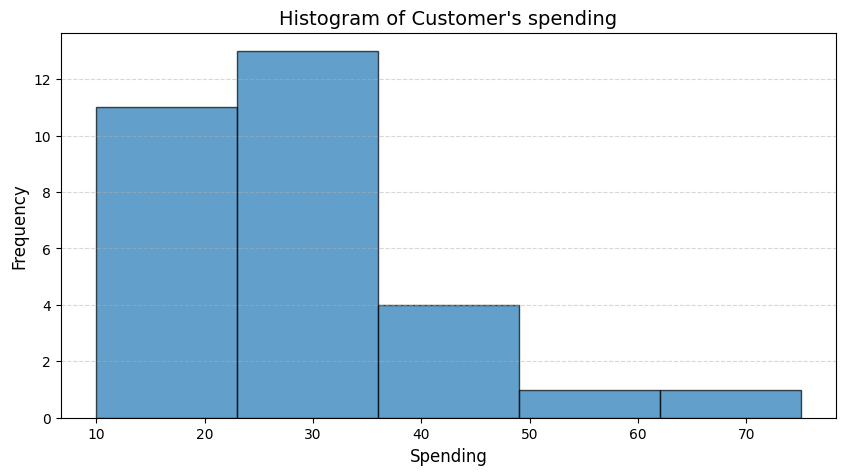

In [14]:
## Boss Question #1:

## “First, can you plot a histogram and tell me what kind of distribution this data looks like?”

import matplotlib.pyplot as plt

spending = [
12, 15, 18, 22, 25, 27, 30, 33, 35, 38,
14, 17, 19, 23, 26, 29, 31, 34, 36, 40,
10, 12, 14, 20, 24, 28, 32, 45, 60, 75
]

plt.figure(figsize=(10,5))
plt.hist(spending,bins=5,edgecolor="black",alpha=0.7)
plt.xlabel("Spending",fontsize=12)
plt.ylabel("Frequency",fontsize=12)
plt.title("Histogram of Customer's spending",fontsize=14)
plt.grid(axis='y',linestyle='--',alpha=0.5)

plt.show()

"""Answer: Boss, based on the histogram, this looks like a 
log-normal distribution because the values are continuous, strictly positive, 
and right-skewed with a long tail caused by high spenders like 45, 60, and 75.
"""

In [17]:
## Boss Question #2: 

"""“OK, now that you have identified the distribution shape, 
can you compute the mean and standard deviation of the spending data?

Also tell me whether the standard deviation seems high or low relative to the mean.”"""

import numpy as np 
mean_spending = np.mean(spending)
sd_spending = np.std(spending,ddof=1)
cv = sd_spending / mean_spending * 100

print(f"Boss the mean is {mean_spending} and the standar deviation is {sd_spending} and the coefficient of variation is {cv} that indicates a high variability ")

Boss the mean is 28.133333333333333 and the standar deviation is 14.170716121717307 and the coefficient of variation is 50.36984403454019 that indicates a high variability 


In [19]:
## Boss Question #3:

"""“Great. Now can you give me a 95% confidence interval for the 
true average spending of all new customers?”"""

SE = sd_spending/np.sqrt(len(spending))
confidence_interval = [mean_spending - (1.96*SE),mean_spending+(1.96*SE)]

print(f"Boss, the true average spending is likely between {confidence_interval[0]} and {confidence_interval[1]}.")

Boss, the true average spending is likely between 23.06240769443376 and 33.20425897223291.


Boss the outliers are [60, 75], because the upper bound is 57.0.
Because the data is log-normally distributed and strictly positive, we only consider outliers above the upper IQR threshold.
Lower outliers are not expected, since spending cannot be negative.


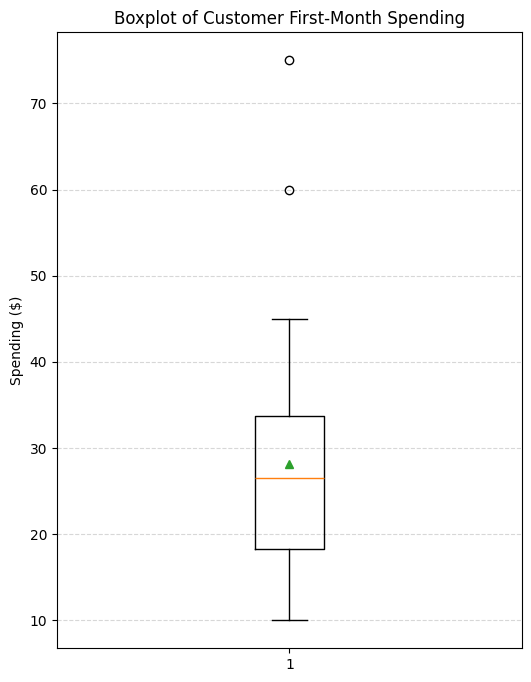

In [28]:
## Boss Question #4:

"""“Nice. Can you also tell me whether we have any outliers in customer spending?

Please use the IQR method, show me the threshold, and list any outliers you find.”"""

order_spendings = np.sort(spending)
Q1 = np.percentile(spending,25)
Q3 = np.percentile(spending,75)

IQR = Q3-Q1 

lower_bound = Q1 - 1.5 * IQR 
upper_bound = Q3 + 1.5 * IQR 

outliers = [x for x in spending if x < lower_bound or x > upper_bound]
print(f"Boss the outliers are {outliers}, because the upper bound is {upper_bound}.")
print("Because the data is log-normally distributed and strictly positive, we only consider outliers above the upper IQR threshold.")
print("Lower outliers are not expected, since spending cannot be negative.")

plt.figure(figsize=(6, 8))
plt.boxplot(spending, vert=True, showmeans=True)
plt.title("Boxplot of Customer First-Month Spending")
plt.ylabel("Spending ($)")
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

## Boss Question #5:

"""“Based on everything you've found — distribution shape, mean, variability, confidence interval, and outliers —
what recommendations can you give the product team so they better understand customer spending behavior?”"""

Answer: What we can see is: 

1. The typical customer spends about $28 in their first month.
The 95% confidence interval [23,33] confirms that most new users fall within this range.
This gives us a clear expectation for baseline revenue per new customer.

2. Spending is highly variable across customers.
The coefficient of variation (CV) is ~50%, which indicates large differences in customer behavior.
Some users spend very little while others spend significantly more — consistent with a log-normal distribution, which is common in consumer behavior.

3. Using the IQR method, these values are above the upper threshold but they are valid customer behaviors, not data errors.
High spenders are valuable segments and should not be removed — they represent real revenue opportunities.

4. Recommendations for the product team:

- Segment customers by spending behavior
    Identify “high-potential” users early and offer personalized upsells or premium content.

- Analyze which products mid-range spenders (Q2–Q3) buy most frequently
    These items may reveal opportunities for bundles or targeted promotions.

- Consider promotions aimed at low spenders
    Encouraging low-spending customers to make an additional purchase could shift the distribution toward a more balanced revenue model.

- Monitor spending behavior over time
    Understanding whether spending becomes more or less variable in later months can inform long-term retention and monetization strategies.